In [11]:
import os
import requests
import pandas as pd

# Step 1: Create a data directory
def create_data_directory():
    
    if not os.path.exists('data'):
        os.makedirs('data')

# Step 2: Download the dataset
def download_dataset():
    
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"  # URL for the Titanic dataset

    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses

        # Save the dataset to a file
        with open('./data/titanic.csv', 'wb') as f:
            f.write(response.content)
        print("Titanic dataset downloaded successfully.")
    
    except requests.exceptions.RequestException as e:
        print(f"Failed to download the dataset. Error: {e}")

# Step 3: Load and display the dataset
def load_dataset():
    
    dataset_path = './data/titanic.csv'
    df = pd.read_csv(dataset_path)
    return df

# Main function to execute the steps
def main():
    """Main function to run the workflow."""
    create_data_directory()
    download_dataset()
    
    # Load the dataset only if it was successfully downloaded
    if os.path.exists('./data/titanic.csv'):
        df = load_dataset()
        print("Dataset loaded successfully.")
        print(df.head())  # Display the first few rows of the dataset
    else:
        print("Dataset file not found, unable to load the dataset.")




Titanic dataset downloaded successfully.
Dataset loaded successfully.
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C

Titanic dataset downloaded successfully.
Model trained successfully.
Model Evaluation Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178

Overall Accuracy: 0.78


/var/folders/qg/_v_tlxp51sv_1s8f0p4hxhfr0000gn/T/ipykernel_1116/2045806832.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='pastel')


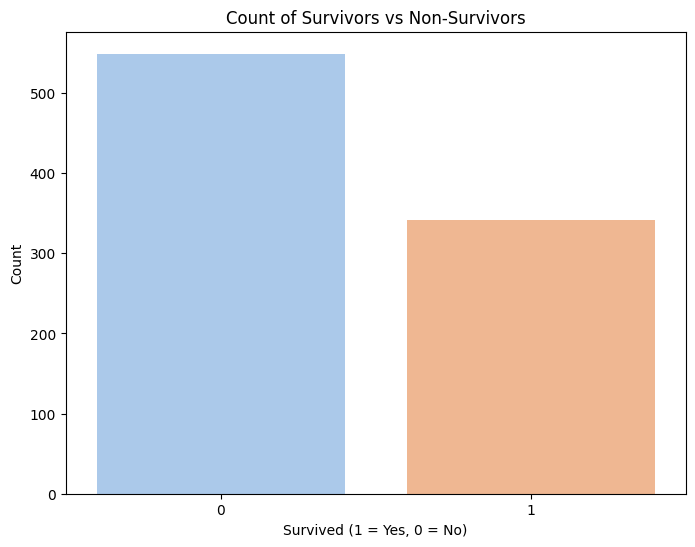

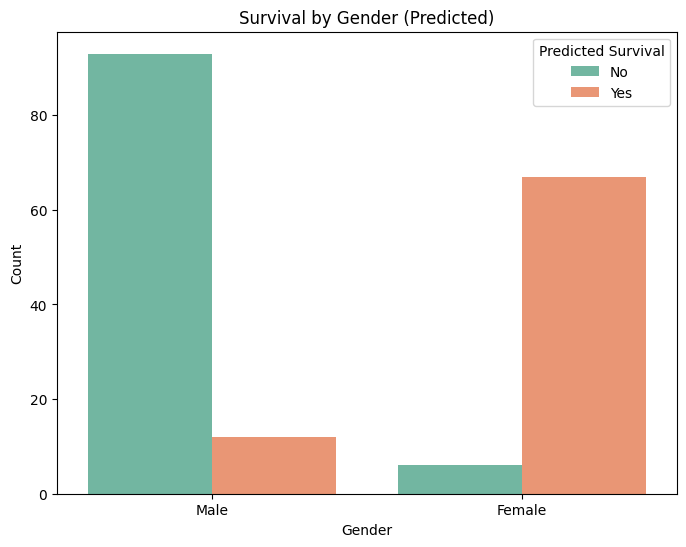

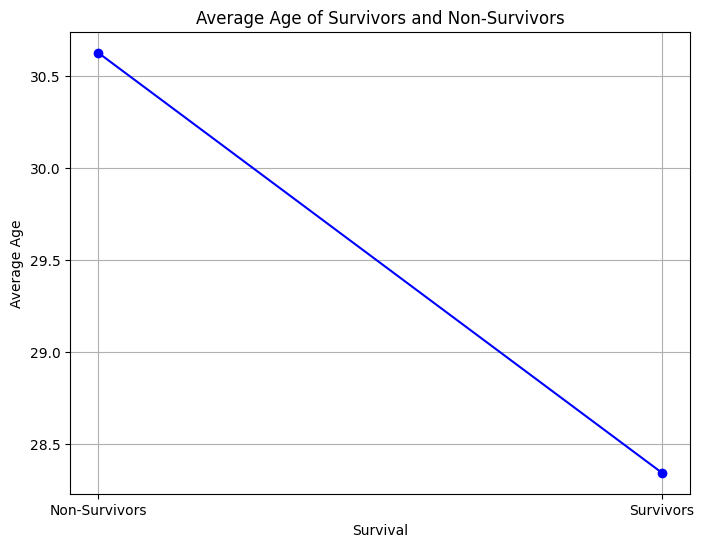

In [26]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Create a data directory
def create_data_directory():
    if not os.path.exists('data'):
        os.makedirs('data')

# Step 2: Download the dataset
def download_dataset():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"  # URL for the Titanic dataset
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses

        # Save the dataset to a file
        with open('./data/titanic.csv', 'wb') as f:
            f.write(response.content)
        print("Titanic dataset downloaded successfully.")
    except requests.exceptions.RequestException as e:
        print(f"Failed to download the dataset. Error: {e}")

# Step 3: Load and display the dataset
def load_dataset():
    dataset_path = './data/titanic.csv'
    df = pd.read_csv(dataset_path)
    return df

# Step 4: Preprocess the data
def preprocess_data(df):
    df = df.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df = df.dropna(subset=['Embarked'])
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

    X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
    y = df['Survived']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Step 5: Train the model
def train_model(X_train, y_train):
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    print("Model trained successfully.")
    return model

# Step 6: Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Model Evaluation Report:")
    print(classification_report(y_test, y_pred))
    print(f"Overall Accuracy: {accuracy:.2f}")
    
    return y_pred

# Step 7: Visualizations
def visualize_results(df, y_test, y_pred):
    # Add predictions to the test set for visualization
    test_set = df.iloc[y_test.index].copy()  # Get original test set rows
    test_set['Predicted'] = y_pred
    
    # Bar chart of survival counts
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='Survived', palette='pastel')
    plt.title('Count of Survivors vs Non-Survivors')
    plt.xlabel('Survived (1 = Yes, 0 = No)')
    plt.ylabel('Count')
    plt.show()

    # Count plot of survival by gender
    plt.figure(figsize=(8, 6))
    sns.countplot(data=test_set, x='Sex', hue='Predicted', palette='Set2')
    plt.title('Survival by Gender (Predicted)')
    plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend(title='Predicted Survival', loc='upper right', labels=['No', 'Yes'])
    plt.show()

    # Line plot of average age by survival
    plt.figure(figsize=(8, 6))
    avg_age = df.groupby('Survived')['Age'].mean()
    avg_age.plot(kind='line', marker='o', color='blue')
    plt.title('Average Age of Survivors and Non-Survivors')
    plt.xticks(ticks=[0, 1], labels=['Non-Survivors', 'Survivors'])
    plt.xlabel('Survival')
    plt.ylabel('Average Age')
    plt.grid()
    plt.show()

# Main function to execute the steps
def main():
    create_data_directory()
    download_dataset()
    df = load_dataset()
    
    # Preprocess the data
    X_train, X_test, y_train, y_test = preprocess_data(df)
    
    # Train the model
    model = train_model(X_train, y_train)
    
    # Evaluate the model
    y_pred = evaluate_model(model, X_test, y_test)
    
    # Visualize results
    visualize_results(df, y_test, y_pred)

# If running as a script
if __name__ == "__main__":
    main()
